# DataGym™ analysis
## Part 1

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, kruskal, mannwhitneyu, spearmanr

%matplotlib inline

sns.set(rc={
    'figure.figsize': (8, 6),
    'font.size': 14
})

In [2]:
customers = pd.read_csv('datagym_customers.csv.gz')
visits = pd.read_csv('datagym_visits.csv.gz')

In [3]:
customers.head()

,customer_id,city,sex,date_birth,date_join,date_quit,q1,q2,q3,q4,q5
0,DG000049,Sheffield,F,1980-07-24,2017-04-19,NaN,NaN,NaN,NaN,NaN,NaN
1,DG000272,Manchester,F,1983-09-24,2013-03-21,2015-10-26,4.0,-1.0,5.0,10.0,3.0
2,DG000325,Liverpool,M,1987-09-15,2011-09-21,NaN,NaN,NaN,NaN,NaN,NaN
3,DG000481,London,M,1974-05-31,2017-06-18,NaN,NaN,NaN,NaN,NaN,NaN
4,DG000537,Glasgow,M,1986-11-25,2015-06-27,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
visits.head()

,customer_id,date
0,DG000049,2017-04-19T09:57:01Z
1,DG000049,2017-04-23T11:08:06Z
2,DG000049,2017-04-25T07:44:24Z
3,DG000049,2017-04-28T08:59:50Z
4,DG000049,2017-05-01T08:54:36Z


In [6]:
visits['date'] = pd.to_datetime(visits.date)

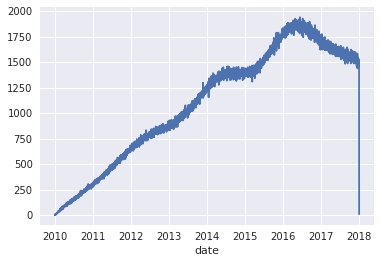

In [8]:
visits.set_index('date').resample('D')['customer_id'].nunique().plot.line()

Set data types for `datetime` variables.

In [3]:
customers['date_birth'] = pd.to_datetime(customers['date_birth'])
customers['date_join'] = pd.to_datetime(customers['date_join'])
customers['date_quit'] = pd.to_datetime(customers['date_quit'])

Recode missing values in questionnaire answers.

In [4]:
customers['q1'].replace(-1, np.NaN, inplace=True)
customers['q2'].replace(-1, np.NaN, inplace=True)
customers['q3'].replace(-1, np.NaN, inplace=True)
customers['q4'].replace(-1, np.NaN, inplace=True)
customers['q5'].replace(-1, np.NaN, inplace=True)

## Descriptive statistics

In [5]:
customers.head()

,customer_id,city,sex,date_birth,date_join,date_quit,q1,q2,q3,q4,q5
0,DG000049,Sheffield,F,1980-07-24,2017-04-19,NaT,NaN,NaN,NaN,NaN,NaN
1,DG000272,Manchester,F,1983-09-24,2013-03-21,2015-10-26,4.0,NaN,5.0,10.0,3.0
2,DG000325,Liverpool,M,1987-09-15,2011-09-21,NaT,NaN,NaN,NaN,NaN,NaN
3,DG000481,London,M,1974-05-31,2017-06-18,NaT,NaN,NaN,NaN,NaN,NaN
4,DG000537,Glasgow,M,1986-11-25,2015-06-27,NaT,NaN,NaN,NaN,NaN,NaN


Create new variable for 'quitters'.

In [6]:
customers['quitter'] = customers['date_quit'].notnull()

### Are there differences by city?

In [7]:
customers['city'].value_counts()

London                 2094
Birmingham             1130
Manchester             1048
Leeds                   921
Glasgow                 706
Liverpool               649
Sheffield               630
Southampton             614
Newcastle upon Tyne     606
Nottingham              537
Name: city, dtype: int64

In [8]:
pd.crosstab(customers['city'], customers['quitter'], normalize='index')

quitter,False,True
city,,
Birmingham,0.569912,0.430088
Glasgow,0.495751,0.504249
Leeds,0.496200,0.503800
Liverpool,0.497689,0.502311
London,0.480898,0.519102
Manchester,0.545802,0.454198
Newcastle upon Tyne,0.519802,0.480198
Nottingham,0.510242,0.489758
Sheffield,0.520635,0.479365


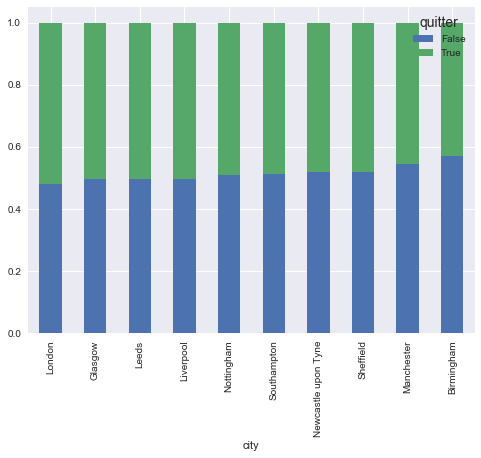

In [9]:
pd.crosstab(customers['city'], customers['quitter'], normalize='index').sort_values(False).plot.bar(stacked=True)

Test differences using $\chi^{2}$ test.

In [10]:
chi2_contingency(pd.crosstab(customers['city'], customers['quitter']))

(30.573194235176484,
 0.00035029091118056271,
 9,
 array([[  579.73363179,   550.26636821],
        [  362.20526021,   343.79473979],
        [  472.50856184,   448.49143816],
        [  332.96205932,   316.03794068],
        [ 1074.30285395,  1019.69714605],
        [  537.66446558,   510.33553442],
        [  310.90139899,   295.09860101],
        [  275.50173475,   261.49826525],
        [  323.21432569,   306.78567431],
        [  315.00570789,   298.99429211]]))

**Conclusion**: some evidence that certain cities have more quitters.

### Are there differences by sex?

In [11]:
customers['sex'].value_counts()

F    5156
M    3779
Name: sex, dtype: int64

In [12]:
pd.crosstab(customers['sex'], customers['quitter'], normalize='index')

quitter,False,True
sex,,
F,0.512413,0.487587
M,0.513893,0.486107


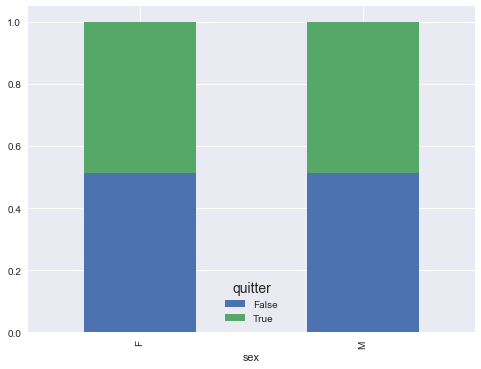

In [13]:
pd.crosstab(customers['sex'], customers['quitter'], normalize='index').plot.bar(stacked=True)

Test differences using $\chi^{2}$ test.

In [14]:
chi2_contingency(pd.crosstab(customers['sex'], customers['quitter']))

(0.013650776852110719,
 0.90698958807347663,
 1,
 array([[ 2645.2270845,  2510.7729155],
        [ 1938.7729155,  1840.2270845]]))

**Conclusion**: no evidence that sex is related to the probability of quitting.

### Are there differences by age?

In [15]:
customers['age_join'] = (customers['date_join'] - customers['date_birth']).astype('timedelta64[Y]')

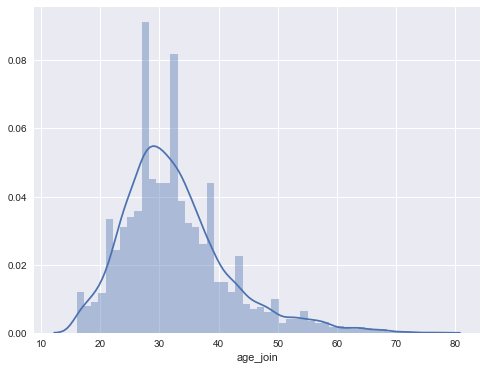

In [16]:
sns.distplot(customers['age_join'])

In [17]:
customers.groupby('quitter')['age_join'].describe()

,count,mean,std,min,25%,50%,75%,max
quitter,,,,,,,,
False,4584.0,32.58726,8.765113,16.0,27.0,31.0,37.0,77.0
True,4351.0,32.53413,9.101935,16.0,26.0,31.0,37.0,76.0


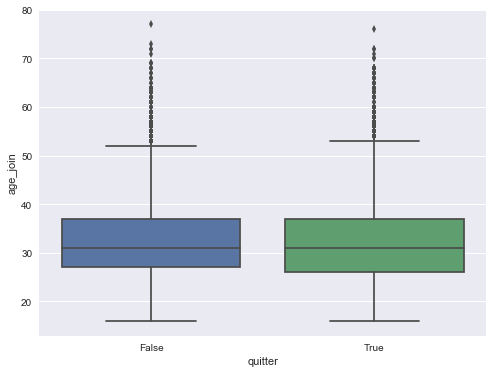

In [18]:
sns.boxplot(x='quitter', y='age_join', data=customers)

Test differences using Mann-Whitney $U$ test.

In [19]:
mannwhitneyu(customers.loc[~customers['quitter'], 'age_join'], customers.loc[customers['quitter'], 'age_join'])

MannwhitneyuResult(statistic=9862918.0, pvalue=0.18410271792398597)

**Conclusion**: no evidence that age at joining is related to the probability of quitting.

### Are there differences by date of quitting?

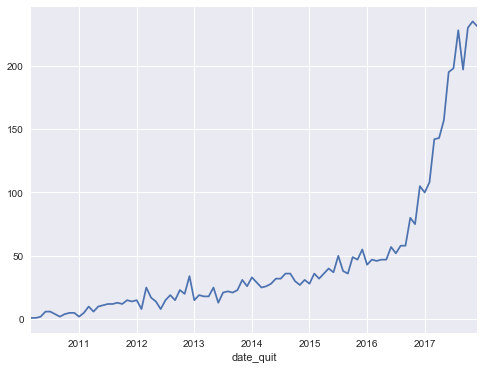

In [20]:
quitters_by_month = customers.set_index('date_quit').resample('M')['quitter'].sum()
quitters_by_month.plot.line()

**Large** increase from mid-2016!
Let's create a variable to signify the (presumed) change in management from mid-2016.

In [21]:
customers['new_management'] = customers.date_quit >= pd.to_datetime('2016-07-02')

### Are there differences in questionnaire answers?
Since questionnaires are only available from quitters, we check for differences by city, sex, age at joining, date of quitting (old/new management), and duration.

In [22]:
customers['duration'] = (customers['date_quit'] - customers['date_join']).astype('timedelta64[M]')

In [23]:
def test_questionnaire_answers(var_name):
    results = {}
    results['city'] = kruskal(*customers.groupby('city')[var_name].apply(list), nan_policy='omit')
    results['sex'] = mannwhitneyu(customers.loc[customers['sex'] == 'M', var_name],
                                  customers.loc[customers['sex'] == 'F', var_name])
    results['age_join'] = spearmanr(customers[var_name], customers['age_join'], nan_policy='omit')
    results['new_management'] = mannwhitneyu(customers.loc[~customers['new_management'], var_name],
                                             customers.loc[customers['new_management'], var_name])
    results['duration'] = spearmanr(customers[var_name], customers['duration'], nan_policy='omit')
    return results

### Q1: Overall service

In [24]:
test_questionnaire_answers('q1')

{'age_join': SpearmanrResult(correlation=0.16433716340065907, pvalue=masked_array(data = 5.97696427647362e-20,
             mask = False,
       fill_value = 1e+20)
),
 'city': KruskalResult(statistic=1486.59185138883, pvalue=0.0),
 'duration': SpearmanrResult(correlation=-0.067377858233078181, pvalue=masked_array(data = 0.00019297111234183801,
             mask = False,
       fill_value = 1e+20)
),
 'new_management': MannwhitneyuResult(statistic=2872817.5, pvalue=0.0),
 'sex': MannwhitneyuResult(statistic=7611357.5, pvalue=1.9816929052035193e-70)}

### Q2: Maintenance and equipment

In [25]:
test_questionnaire_answers('q2')

{'age_join': SpearmanrResult(correlation=0.029532323100122104, pvalue=masked_array(data = 0.10128210559132352,
             mask = False,
       fill_value = 1e+20)
),
 'city': KruskalResult(statistic=982.08613379456108, pvalue=1.2562619024255088e-205),
 'duration': SpearmanrResult(correlation=0.068683874390868649, pvalue=masked_array(data = 0.00013631624329500961,
             mask = False,
       fill_value = 1e+20)
),
 'new_management': MannwhitneyuResult(statistic=2947657.5, pvalue=0.0),
 'sex': MannwhitneyuResult(statistic=7576014.5, pvalue=9.3694821439045181e-73)}

### Q3: Cleanliness

In [26]:
test_questionnaire_answers('q3')

{'age_join': SpearmanrResult(correlation=0.10149277978465965, pvalue=masked_array(data = 1.2660342946468774e-08,
             mask = False,
       fill_value = 1e+20)
),
 'city': KruskalResult(statistic=2419.7249379026821, pvalue=0.0),
 'duration': SpearmanrResult(correlation=0.067760462439111158, pvalue=masked_array(data = 0.00014835880034764392,
             mask = False,
       fill_value = 1e+20)
),
 'new_management': MannwhitneyuResult(statistic=2658087.5, pvalue=0.0),
 'sex': MannwhitneyuResult(statistic=7292117.0, pvalue=2.3696837811057799e-92)}

### Q4: Location

In [27]:
test_questionnaire_answers('q4')

{'age_join': SpearmanrResult(correlation=0.14105628600008058, pvalue=masked_array(data = 4.363884622878389e-15,
             mask = False,
       fill_value = 1e+20)
),
 'city': KruskalResult(statistic=2865.4313355329132, pvalue=0.0),
 'duration': SpearmanrResult(correlation=0.15304987028061767, pvalue=masked_array(data = 1.6148320177092172e-17,
             mask = False,
       fill_value = 1e+20)
),
 'new_management': MannwhitneyuResult(statistic=2936872.5, pvalue=0.0),
 'sex': MannwhitneyuResult(statistic=7399751.0, pvalue=1.7830118262706361e-85)}

### Q5: Cannot find time to exercise

In [28]:
test_questionnaire_answers('q5')

{'age_join': SpearmanrResult(correlation=-0.02714899685632699, pvalue=masked_array(data = 0.13266386676432873,
             mask = False,
       fill_value = 1e+20)
),
 'city': KruskalResult(statistic=303.95322660620485, pvalue=3.7846051426570698e-60),
 'duration': SpearmanrResult(correlation=-0.28509920699143199, pvalue=masked_array(data = 1.7467465805943557e-58,
             mask = False,
       fill_value = 1e+20)
),
 'new_management': MannwhitneyuResult(statistic=2759365.5, pvalue=0.0),
 'sex': MannwhitneyuResult(statistic=7867725.5, pvalue=5.0438583416262873e-55)}

#### How correlated are questionnaire answers?

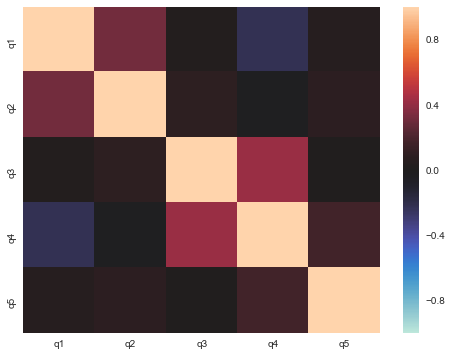

In [29]:
sns.heatmap(customers[['q1', 'q2', 'q3', 'q4', 'q5']].corr(), vmin=-1, vmax=1, center=0)

**Conclusion**: first three questions mildly correlated with each other, last two quite uncorrelated with the rest.

## Conclusions
* Preliminary analyses identified a few influential variables, including when the change in management most likely occurred.
* Analysis of questionnaire data also identified a few changes following the (presumed) change in management.

### Future analyses
* Have a look at the 'visits' dataset, and derive new variables (e.g. frequency of visits during the first month after joining, or the first month following the change in management...)